# Universida Politecnica Salesiana 
  ### Nombre: Erika Morocho
  ### Asignatura: Simulacion
  ### Fecha: 23/11/2020

In [34]:
import math
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

%matplotlib inline

In [4]:
df = pd.read_csv('owid-covid-data.csv').fillna(0) 
ndf= df.loc[(df['location'] == 'Costa Rica') & (df['total_cases'] != 0)] 
ndf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
12074,CRI,North America,Costa Rica,2020-03-07,1.0,1.0,0.000,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12075,CRI,North America,Costa Rica,2020-03-09,5.0,4.0,0.000,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12076,CRI,North America,Costa Rica,2020-03-10,9.0,4.0,0.000,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12077,CRI,North America,Costa Rica,2020-03-11,13.0,4.0,0.000,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12078,CRI,North America,Costa Rica,2020-03-12,22.0,9.0,0.000,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12079,CRI,North America,Costa Rica,2020-03-13,23.0,1.0,3.286,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12080,CRI,North America,Costa Rica,2020-03-14,26.0,3.0,3.571,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12081,CRI,North America,Costa Rica,2020-03-15,27.0,1.0,3.714,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12082,CRI,North America,Costa Rica,2020-03-16,35.0,8.0,4.286,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794
12083,CRI,North America,Costa Rica,2020-03-17,41.0,6.0,4.571,0.0,0.0,0.000,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794


In [5]:
df = df[df['location'].isin(['Costa Rica'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases','iso_code']] #Selecciono las columnas de analasis
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-30", FMT)).days)

df

,date,total_cases,iso_code
12074,68,1.0,CRI
12075,70,5.0,CRI
12076,71,9.0,CRI
12077,72,13.0,CRI
12078,73,22.0,CRI
12079,74,23.0,CRI
12080,75,26.0,CRI
12081,76,27.0,CRI
12082,77,35.0,CRI
12083,78,41.0,CRI


Text(0, 0.5, 'Numero de casos')

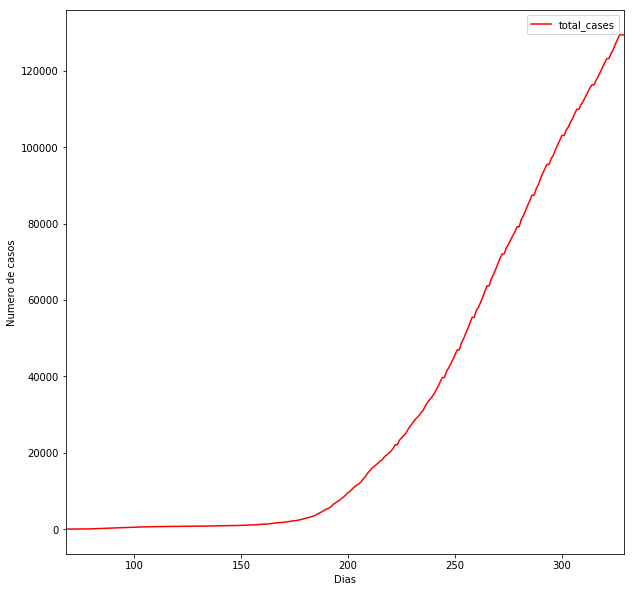

In [6]:
plt.rcParams['figure.figsize']=[10,10]
ax=df.plot(x='date',y='total_cases',color='red')
ax.set_xlabel("Dias")
ax.set_ylabel("Numero de casos")

## Regresion Lineal

In [7]:

x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

# Creamos el objeto de Regresión Lineal
modelo = linear_model.LinearRegression()

# Entrenamos nuestro modelo
modelo.fit(np.array(x).reshape(-1, 1),y)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo.intercept_)

Coefficients: 
 [492.66905898]
Independent term: 
 -64990.0443879466


In [8]:
y_prediccion = modelo.predict([[len(x)+7]])

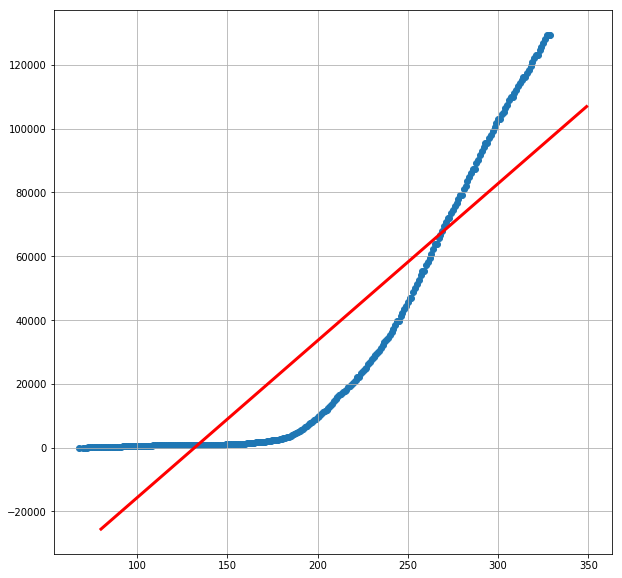

Prediccion Proxima Semana: 
67045


In [9]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(80, 350))
plt.plot(x_real, modelo.predict(x_real.reshape(-1, 1)), color='red',linewidth=3.0)
plt.grid()
plt.show()
print("Prediccion Proxima Semana: ")
print(int(y_prediccion))

### Regresion Exponencial

In [10]:
c=-2

def exponencial(x, a, b):
    return a * np . exp ( - b * (x  + c))

exp_fit = np.polyfit((x),np.log(y), deg=1)
print(exp_fit)

[0.03156511 2.41444012]


Prediccion 129418.0


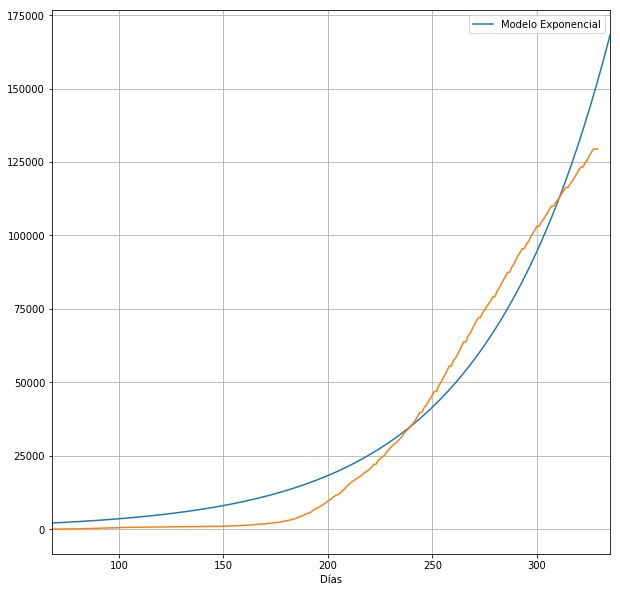

In [11]:
# Generar el modelo exponencial para la predicción de 7 días (día 75+45 = 120)
x_Exp = x[:]
y_Exp = y[:]
def genExp(varIn, a, b):
    return a*np.exp(b*varIn)
# Creación de dataframes para el almacenamieto de los resultados
modeloExp = pd.DataFrame(columns=('Días', 'Modelo Exponencial'))

parametros, valoresCovarianza = curve_fit(genExp, x_Exp, y_Exp, p0=(0,0))

# Asignación de valores a la variable dependiente según la ecuación anterior
pred_x = np.array(list(range(min(x),max(x)+7)))

for pred in pred_x:
    modeloExp.loc[len(modeloExp)] = [pred,genExp(pred, parametros[0], parametros[1])]
# Gráfico del modelo exponencial
modeloExp.plot(x='Días', y='Modelo Exponencial')
plt.plot(x_Exp,y_Exp)
plt.grid()

print('Prediccion',y[len(y)-1])

In [12]:
c=-2

def exponencial(x, a, b):
    return a * np . exp ( - b * (x  + c))

exp_fit = np.polyfit((x),np.log(y), deg=1)
print(exp_fit)

[0.03156511 2.41444012]


Prediccion 437465.02531701466


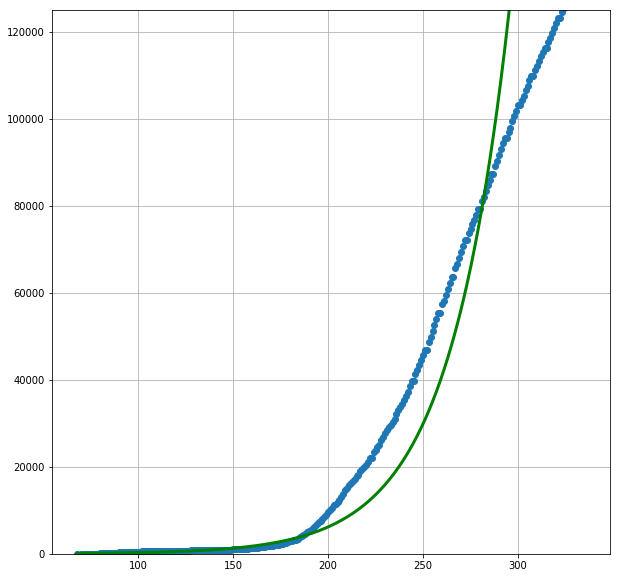

In [13]:
pred_x = np.array(list(range(min(x),max(x)+7)))
yx = np.exp(exp_fit[1]) * np.exp(exp_fit[0]*pred_x)

plt.plot(x,y,'o')
plt.plot(pred_x,yx,color="green",linewidth=3.0)
plt.ylim(-10,125000)

plt.grid(True)

print('Prediccion',yx[len(yx)-1])

### Regresion Polinomica

PREDICCION:  65973.02008


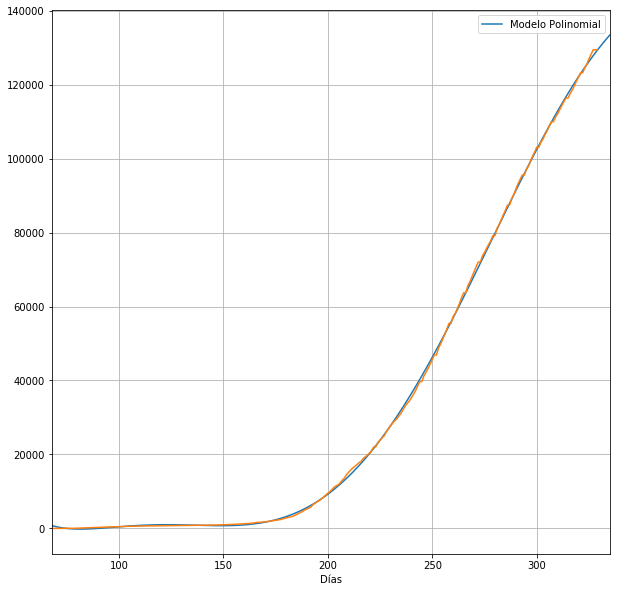

In [14]:
# Generar el modelo polinómico para la predicción de 7 días (día 75+45 = 120)
modeloPol = pd.DataFrame(columns=('Días', 'Modelo Polinomial'))
# Obtención de la ecuación polinomial de grado 'n'
y_polinomial = np.poly1d(np.polyfit(x,y,6))
# Asignación de valores a la variable dependiente según la ecuación anterior
for pred in pred_x:
    modeloPol.loc[len(modeloPol)] = [pred, y_polinomial(pred)]
# Gráfico del modelo polinomial de grado 9    
modeloPol.plot(x='Días',y='Modelo Polinomial')
plt.plot(x, y)
plt.grid()
print("PREDICCION: " , round(y_polinomial(len(x)+7),5))


### Regresion Logistica

61151.203284706295


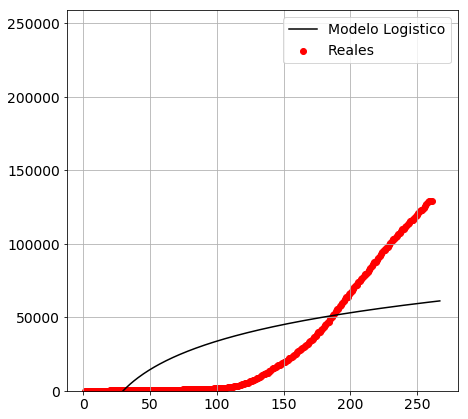

In [79]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression  


def modelo_logistico(x,a,b):
    return a+b*np.log(x)

x=np.arange(1,len(df)+1,1)
y=np.array(df.values[:,1])

exp = curve_fit(modelo_logistico,x,y)

pred_x = list(range(min(x),max(x)+7))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

plt.scatter(x,y,label="Reales",color="red")

val = [modelo_logistico(i,exp[0][0],exp[0][1]) for i in pred_x]
plt.plot(pred_x, [modelo_logistico(i,exp[0][0],exp[0][1]) for i in pred_x], label="Modelo Logistico",color="black")
plt.legend()
print(val[len(pred_x)-1])

plt.ylim(0,max(y)*2)
plt.grid()
plt.show()

### Probabilistico

In [75]:
df = pd.read_csv('owid-covid-data.csv').fillna(0) 
df = df[df['location'].isin(['Costa Rica'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)
df

,date,total_cases
12074,66,1.0
12075,68,5.0
12076,69,9.0
12077,70,13.0
12078,71,22.0
12079,72,23.0
12080,73,26.0
12081,74,27.0
12082,75,35.0
12083,76,41.0


In [76]:
filtro = df['total_cases']
media = filtro.mean()
mediana = filtro.median()
print('medina:',mediana)
print('media:',media)



medina: 8986.0
media: 33049.21072796935


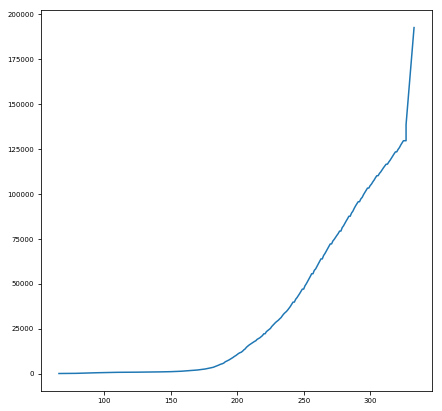

Predicion Total de los casos  201306


In [21]:
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
    prediccion_siguiente = int(y[-1] + mediana)
plt.plot(x, y)
plt.show()

print('Predicion Total de los casos ',prediccion_siguiente)

### Cual tine una mejor prediccion

El modelo que tiene mayor prediccion es el polinomial, dando que se adapto mejor a la curva,brindo un valor exacto de contagiados dentro de el lapso de los 7 dias, ya que la grafia va creciendo  y se va ajustando a los presicion de los los datos.

### Ventajas y desventajas de los modelos

### Ventajas

**Mod.Lineal**

- una de las ventajas que tinee el modelo lineal, es que nos permite hacer una prediccion del comportamiento desde un punto determinado,muy sencillo de entender y rapido de modelar.

**Mod.Exponencial**
 
- Es un proceso que se ajusta mejor al conjunto de datos, ya que describe el crecimeinto de infeccion imparable.


**Mod.Polinomial**

- Funciona con cualquier tamaño de muestra.
- Trabaja bien sobre datos no lineales.

**Mod.Logaritmica**

- Es utilizado para describir el crecimiento de la poblacion.
- Es un modelo facil de clasificar

### Desventajas

**Mod.Lineal**

- una de las desventajas que tiene es que no se puede modelar relaciones complejas no lineales

**Mod.Exponencial**

- En el modelo exponecial los valores de grado depende de la presicion, ya sea en el creciento.

**Mod.Polinomial**

- Se requiere elegir el grado correcto del polinomio para una buena relación sesgo/varianza.

**Mod.Logaritmica**

- Este modelo no resuelve proeblemas no lineales, por lo que su presicion no es buena.


### Principal problema del modelo probabilistico

Trabajar con el modelo probabilisticos, es adecuado pero cuando se tiene valores pequeños, pero al tener una gran cantidad de valores el modelo no predice de manera correcta, por lo que abordaria un marge de error en la prediccion de los datos.